# Importing and Basic Setup

In [582]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [583]:
#reading data
bladder = pd.read_csv('BLCA.txt', sep='\t')
lung = pd.read_csv('LUNG.txt', sep='\t')
liver = pd.read_csv('LIHC.txt', sep='\t')
prostate = pd.read_csv('PRAD.txt', sep='\t')
colorectal = pd.read_csv('COADREAD.txt', sep='\t')

#convert to dataframe
df_bladder = pd.DataFrame(data=bladder).T
df_lung = pd.DataFrame(data=lung).T
df_liver = pd.DataFrame(data=liver).T
df_prostate = pd.DataFrame(data=prostate).T
df_colorectal = pd.DataFrame(data=colorectal).T

In [584]:
df_bladder.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20520,20521,20522,20523,20524,20525,20526,20527,20528,20529
sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-BT-A20R-11,9.5108,9.912,0.481,12.1945,12.2938,10.4798,12.0096,4.5087,0.0,3.4454,...,3.7298,2.6193,3.3365,1.369,8.9704,15.0181,7.7408,10.308,9.7928,9.6084
TCGA-DK-AA6S-01,10.2072,4.6937,0.0,11.9627,10.4173,9.7429,12.4835,5.5167,0.0,5.6115,...,0.0,1.166,4.469,1.8024,9.1136,13.094,7.2784,11.8967,5.9385,10.1122
TCGA-DK-A6B2-01,11.0213,3.6696,1.6294,12.0141,10.7757,10.5314,12.6079,4.6841,0.0,2.3751,...,0.0,2.8642,4.7752,1.174,9.4724,12.1795,8.1179,11.1291,9.1688,9.9545
TCGA-GU-A763-01,11.3853,3.4247,0.0,12.1776,9.8347,9.3653,12.7149,0.8572,0.0,2.0861,...,0.0,2.2178,2.0861,4.8578,8.1027,8.6766,5.5991,13.0235,4.0373,10.2126


In [585]:
#make gene first row
df_bladder.reset_index(inplace=True)
df_bladder.columns = df_bladder.iloc[0]
df_bladder = df_bladder.drop(0)

df_lung.reset_index(inplace=True)
df_lung.columns = df_lung.iloc[0]
df_lung = df_lung.drop(0)

df_liver.reset_index(inplace=True)
df_liver.columns = df_liver.iloc[0]
df_liver = df_liver.drop(0)

df_prostate.reset_index(inplace=True)
df_prostate.columns = df_prostate.iloc[0]
df_prostate = df_prostate.drop(0)

df_colorectal.reset_index(inplace=True)
df_colorectal.columns = df_colorectal.iloc[0]
df_colorectal = df_colorectal.drop(0)

In [586]:
#provide ground-truth labels
df_bladder['Cancer_Type'] = '1'
df_lung['Cancer_Type'] = '2'
df_liver['Cancer_Type'] = '3'
df_prostate['Cancer_Type'] = '4'
df_colorectal['Cancer_Type'] = '5'

In [587]:
#split datasets into training/testing sets in 70:30 ratio
df_bladder_train, df_bladder_test = train_test_split(df_bladder, test_size=0.3, random_state=42)
df_lung_train, df_lung_test = train_test_split(df_lung, test_size=0.3, random_state=42)
df_liver_train, df_liver_test = train_test_split(df_liver, test_size=0.3, random_state=42)
df_prostate_train, df_prostate_test = train_test_split(df_prostate, test_size=0.3, random_state=42)
df_colorectal_train, df_colorectal_test = train_test_split(df_colorectal, test_size=0.3, random_state=42)

In [588]:
#combine datasets
df_trainingset = pd.concat([df_bladder_train, df_lung_train, df_liver_train, df_prostate_train, df_colorectal_train])
df_testset = pd.concat([df_bladder_test, df_lung_test, df_liver_test, df_prostate_test, df_colorectal_test])

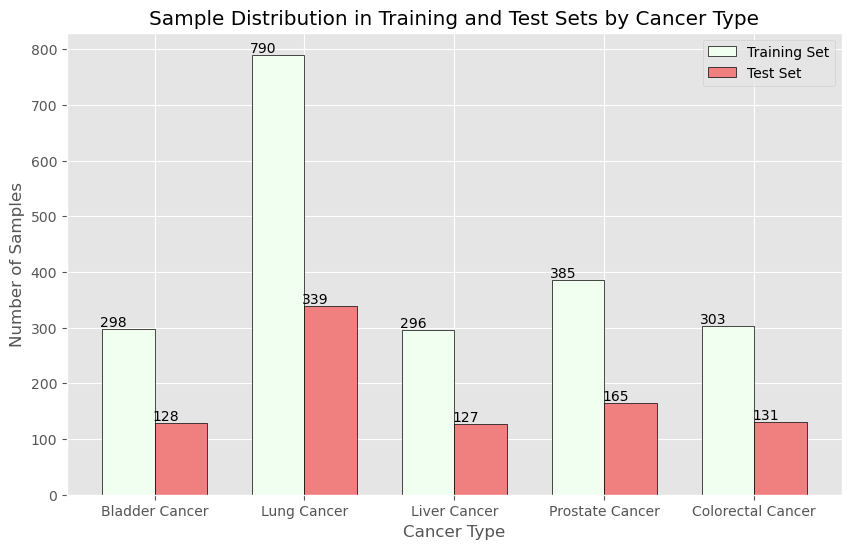

In [589]:
#display distribution of training set and test set across tumor types as bar chart

plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
bar_width = 0.35
index = range(len(train_counts))

plt.bar(index, train_counts, bar_width, color='honeydew', edgecolor='black', label='Training Set')
plt.bar([i + bar_width for i in index], test_counts, bar_width, color='lightcoral', edgecolor='black', label='Test Set')

plt.xlabel('Cancer Type')
plt.ylabel('Number of Samples')
plt.title('Sample Distribution in Training and Test Sets by Cancer Type')
plt.xticks([i + bar_width / 2 for i in index], cancer_types)  
plt.legend()

for i, v in enumerate(train_counts):
    plt.text(i - 0.1, v + 5, str(v), color='black', ha='center')

for i, v in enumerate(test_counts):
    plt.text(i + bar_width - 0.1, v + 5, str(v), color='black', ha='center')

#plt.savefig('distribution.png')
plt.show()

#
#Ref; Annotated bar chart, Stackoverflow,  answered by User: Simon Gibbons (Online: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart)

In [590]:
df_trainingset.shape

(2072, 20532)

In [591]:
df_testset.shape

(890, 20532)

In [592]:
training_size = 2072 / (2072 + 890)
testing_size = 890 / (2072 + 890)
print(training_size)
print(testing_size)

0.699527346387576
0.30047265361242403


In [593]:
df_trainingset.head(10)

,sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Cancer_Type
251,TCGA-C4-A0F1-01,7.5795,1.3829,0.0,12.0739,10.7557,10.8454,11.6596,3.4833,0.0,...,3.1763,3.9515,4.0482,8.8582,13.3535,6.9386,11.2156,3.2594,9.8946,1
399,TCGA-DK-AA6L-01,10.7696,2.045,0.0,12.4424,11.3628,9.9559,12.9838,2.7511,0.0,...,0.0,4.7578,0.0,8.6064,11.6526,5.7309,11.277,3.7556,10.1019,1
119,TCGA-FD-A62S-01,9.3792,3.0582,0.4928,11.764,10.9887,9.9448,11.6815,5.3685,0.4928,...,0.4928,5.6748,1.1516,9.3633,13.6915,7.4161,10.8029,6.7615,10.0394,1
115,TCGA-G2-A2EO-01,9.8185,3.2941,0.5747,12.1824,10.7332,9.7684,12.5933,4.2926,0.0,...,0.0,5.8151,3.4954,9.0244,12.12,7.595,11.3684,3.971,10.9873,1
138,TCGA-XF-AAMX-01,11.8055,0.0,5.5877,13.1348,10.3313,10.0921,11.845,4.3629,0.6127,...,0.6127,2.6533,2.9779,10.2166,10.8748,6.9697,12.2017,3.4664,10.0602,1
375,TCGA-E7-A85H-01,11.1975,7.6673,0.8376,11.9539,10.281,10.1775,12.3281,2.7026,1.1247,...,1.1247,3.5392,3.0836,8.312,10.609,7.1566,11.6878,7.7248,10.9086,1
284,TCGA-XF-AAN5-01,8.2557,2.2583,1.5321,11.3973,10.361,10.2532,12.7338,2.9303,0.0,...,0.0,4.7303,2.2583,9.9452,12.7904,6.0911,12.0158,6.0709,9.589,1
333,TCGA-GC-A3WC-11,10.7009,10.6578,0.0,11.8254,11.467,10.4237,12.1356,5.4832,0.0,...,2.6433,4.6043,0.6628,8.8433,14.5665,8.8433,10.8705,7.4919,9.6404,1
380,TCGA-ZF-A9R4-01,10.6752,0.0,0.0,12.2784,12.6407,10.6756,12.7769,1.8155,0.0,...,2.1243,3.1667,0.5059,8.6619,8.5123,6.0828,11.0914,4.084,9.8598,1
313,TCGA-E7-A5KF-01,11.8247,5.3849,0.8354,12.1744,10.8152,9.89,12.4358,0.4774,1.361,...,0.0,0.8354,3.9551,8.3595,7.7725,5.7428,11.8944,2.9386,10.0539,1


# Preprocessing & Dimension Reduction

In [594]:
from sklearn.decomposition import PCA

In [595]:
#splitting datasets by features and labels
X_train = df_trainingset.drop(columns=['Cancer_Type', 'sample'])
y_train = df_trainingset['Cancer_Type']

X_test = df_testset.drop(columns=['Cancer_Type', 'sample']) 
y_test = df_testset['Cancer_Type']

In [596]:
#gene filtration via threshold value
expression_threshold = 0.15 #adjust for filtration level

#remove genes with expression values 0.15 or below 
filtered_genes = X_train.columns[(X_train <= expression_threshold).any()]

X_train = X_train.drop(columns=filtered_genes)
X_test = X_test.drop(columns=filtered_genes)

In [597]:
X_train.shape

(2072, 11067)

In [598]:
print('Number of genes below threshold value:' )
filtered = 20531 - 11067
print(filtered)
print('Percantage:', filtered*100/20531,'%')

Number of genes below threshold value:
9464
Percantage: 46.09614728946471 %


In [599]:
#performing principal component analysis
pca = PCA(n_components=0.95) #adjust for maintained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [600]:
print('Final training data dimensions', X_train_pca.shape)
print('Final test data dimensions', X_test_pca.shape)

Final training data dimensions (2072, 656)
Final test data dimensions (890, 656)


# Model Training & Performance Analysis

In [601]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [602]:
#computationally intense, please wait
#training lasso logistic regression model

from sklearn.linear_model import LogisticRegression

lasso_model = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=2200)
lasso_model.fit(X_train_pca, y_train)

y_pred_log = lasso_model.predict(X_test_pca)

In [603]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification_report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.9932584269662922

Confusion Matrix:
 [[126   2   0   0   0]
 [  1 338   0   0   0]
 [  1   0 125   0   1]
 [  0   0   0 165   0]
 [  0   1   0   0 130]]

Classification_report:
               precision    recall  f1-score   support

           1       0.98      0.98      0.98       128
           2       0.99      1.00      0.99       339
           3       1.00      0.98      0.99       127
           4       1.00      1.00      1.00       165
           5       0.99      0.99      0.99       131

    accuracy                           0.99       890
   macro avg       0.99      0.99      0.99       890
weighted avg       0.99      0.99      0.99       890



In [604]:
#training decision tree model

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=8)  #adjust depth for regularization
tree_model.fit(X_train_pca, y_train)

y_pred_tree = tree_model.predict(X_test_pca)

In [605]:
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification_report:\n", classification_report(y_test, y_pred_tree))

Accuracy: 0.9235955056179775

Confusion Matrix:
 [[ 99  24   1   2   2]
 [ 14 320   1   2   2]
 [  1   3 123   0   0]
 [  0   4   0 161   0]
 [  1   9   1   1 119]]

Classification_report:
               precision    recall  f1-score   support

           1       0.86      0.77      0.81       128
           2       0.89      0.94      0.92       339
           3       0.98      0.97      0.97       127
           4       0.97      0.98      0.97       165
           5       0.97      0.91      0.94       131

    accuracy                           0.92       890
   macro avg       0.93      0.91      0.92       890
weighted avg       0.92      0.92      0.92       890



In [606]:
#training svm model

from sklearn.svm import SVC

svm_model = SVC(kernel='poly', C=1)  
svm_model.fit(X_train_pca, y_train)

y_pred_svm = svm_model.predict(X_test_pca)

In [607]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification_report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.9719101123595506

Confusion Matrix:
 [[119   9   0   0   0]
 [  2 337   0   0   0]
 [  1  11 115   0   0]
 [  0   1   0 164   0]
 [  0   1   0   0 130]]

Classification_report:
               precision    recall  f1-score   support

           1       0.98      0.93      0.95       128
           2       0.94      0.99      0.97       339
           3       1.00      0.91      0.95       127
           4       1.00      0.99      1.00       165
           5       1.00      0.99      1.00       131

    accuracy                           0.97       890
   macro avg       0.98      0.96      0.97       890
weighted avg       0.97      0.97      0.97       890



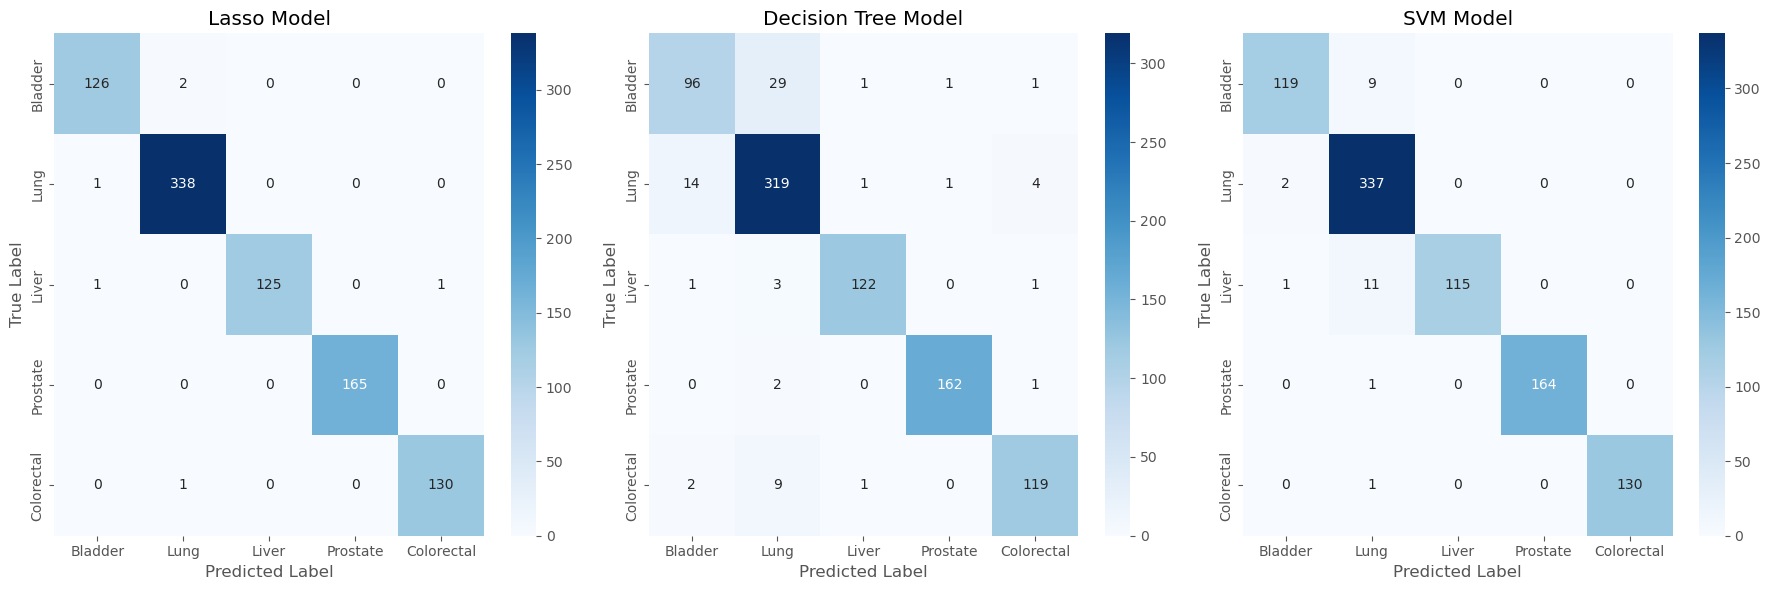

In [608]:
import seaborn as sns

#confusion matrices from performance analysis
conf_log = np.array([[126, 2, 0, 0, 0],
                          [1, 338, 0, 0, 0],
                          [1, 0, 125, 0, 1],
                          [0, 0, 0, 165, 0],
                          [0, 1, 0, 0, 130]])

conf_tree = np.array([[96, 29, 1, 1, 1],
                          [14, 319, 1, 1, 4],
                          [1, 3, 122, 0, 1],
                          [0, 2, 0, 162, 1],
                          [2, 9, 1, 0, 119]])

conf_svm = np.array([[119, 9, 0, 0, 0],
                          [2, 337, 0, 0, 0],
                          [1, 11, 115, 0, 0],
                          [0, 1, 0, 164, 0],
                          [0, 1, 0, 0, 130]])

classes = ['Bladder', 'Lung', 'Liver', 'Prostate', 'Colorectal']
matrices = ['Lasso Model', 'Decision Tree Model', 'SVM Model']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, conf_matrix in enumerate([conf_log, conf_tree, conf_svm]):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, ax=axes[i])
    axes[i].set_title(matrices[i])
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

#
#Ref; Confusion Matrix code inspired by User: Calvin Duy Canh Tran, StackOverflow (Online: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels )

# Additional Gene Expression Analysis

K-means clustering is performed to analyse for clusters in tumor types - clusters closer together indicate that tumors
may be affected by similar gene identifiers.

C:\Users\Cryao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


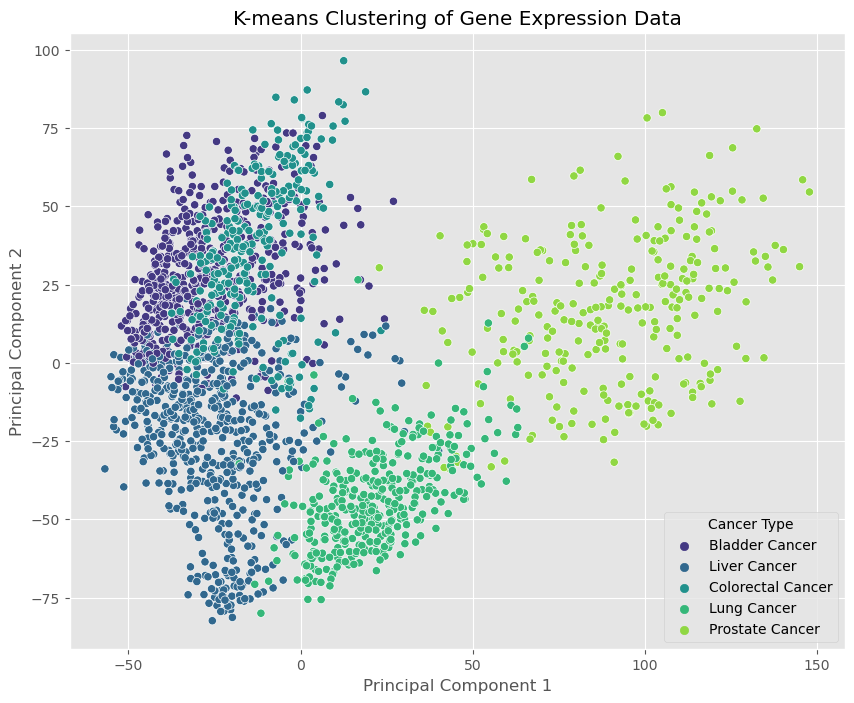

In [609]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)

cluster_centroids = kmeans.cluster_centers_

cluster_to_cancer = {0: 'Bladder Cancer', 1: 'Lung Cancer', 2: 'Liver Cancer', 3: 'Prostate Cancer', 4: 'Colorectal Cancer'}
cancer_labels = [cluster_to_cancer[cluster] for cluster in cluster_labels]

plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=cancer_labels, palette='viridis')
plt.title('K-means Clustering of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cancer Type')

#plt.savefig('kmeans.png')
plt.show()

#
#Ref; Code block by W3schools.com (Online: https://www.w3schools.com/python/python_ml_k-means.asp)

Top genes responsible for dicating a classification can be extracted from the decision tree model - these genes can point towards future research establishing certain genes being more likely to lead to the development of certain tumors.

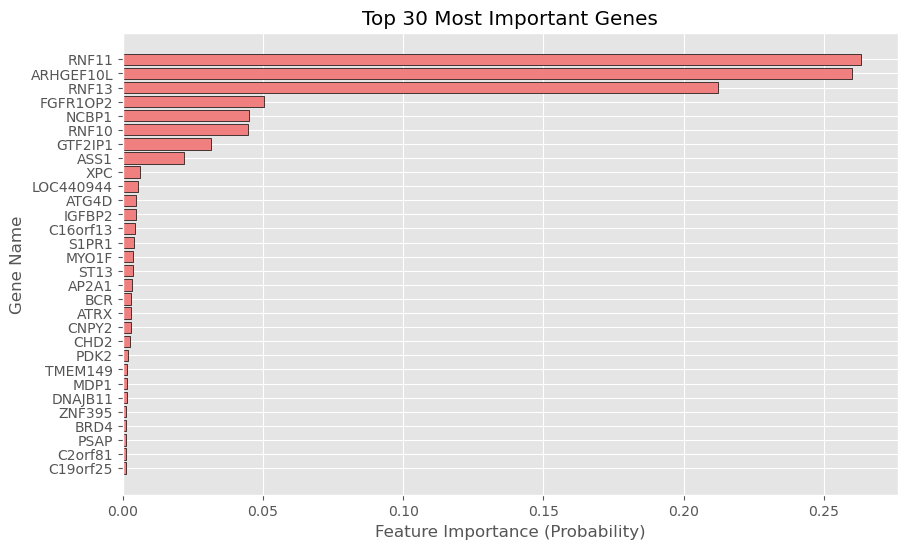

In [610]:
#extract most important genes
importances = tree_model.feature_importances_

#display top 30 genes
top_n = 30
indices = np.argsort(importances)[::-1][:top_n]
gene_names = X_train.columns[indices]

#probabilities of genes
gene_importances = importances[indices]

plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
plt.barh(range(top_n), gene_importances, align='center', color='lightcoral', edgecolor='black')
plt.yticks(range(top_n), gene_names)
plt.xlabel('Feature Importance (Probability)')
plt.ylabel('Gene Name')
plt.title(f'Top {top_n} Most Important Genes')
plt.gca().invert_yaxis()  

#plt.savefig('topgenes.png')
plt.show()

#
#Ref; Horizontal Bar Chart Code Block by User: Igonato, answered 2013. (Online: https://stackoverflow.com/a/19199002)

The top three genes are visibly exhibitng the highest probability. The gene expression distribution of these genes could be compared to normal non-cancerous tissues to investigate whether these genes are abnormally expressed in cancerous cells.

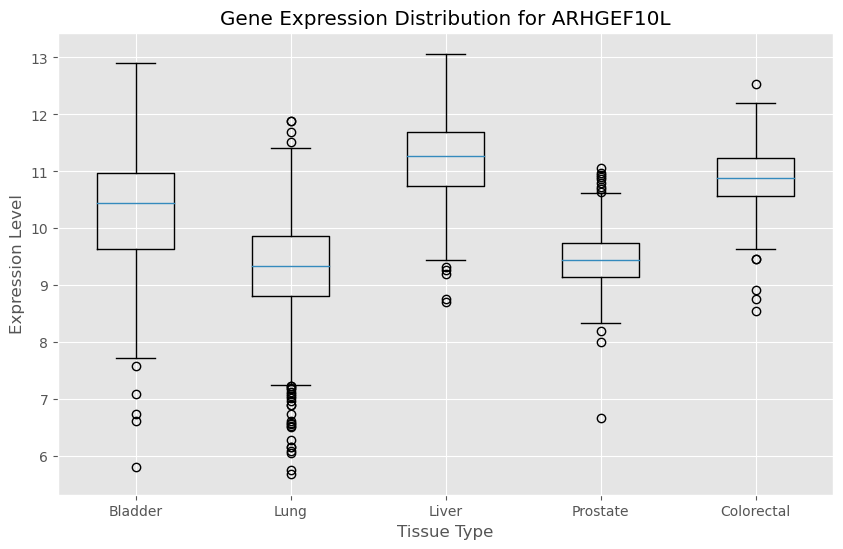

In [611]:
gene_name = 'ARHGEF10L'
labels = ['Bladder', 'Lung', 'Liver', 'Prostate', 'Colorectal']

ARHGEF10L_bladder = df_bladder[gene_name]
ARHGEF10L_lung = df_lung[gene_name]
ARHGEF10L_liver = df_liver[gene_name]
ARHGEF10L_prostate = df_prostate[gene_name]
ARHGEF10L_colorectal = df_colorectal[gene_name]

ARHGEF10L_gene_expressions = [ARHGEF10L_bladder, ARHGEF10L_lung, ARHGEF10L_liver, ARHGEF10L_prostate, ARHGEF10L_colorectal]

plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
plt.boxplot(ARHGEF10L_gene_expressions, labels=labels)
plt.title('Gene Expression Distribution for ARHGEF10L')
plt.ylabel('Expression Level')
plt.xlabel('Tissue Type')
plt.grid(True)

#plt.savefig('arh.png')
plt.show()

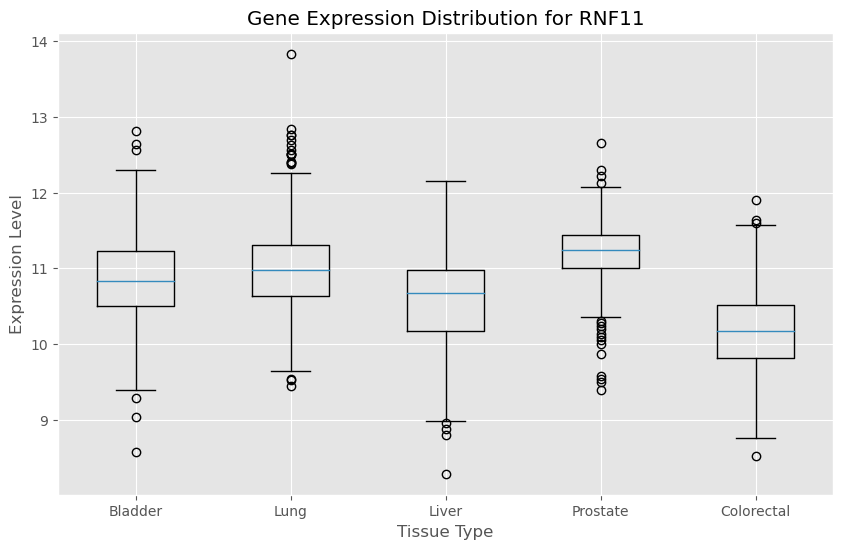

In [612]:
gene_name = 'RNF11'

RNF11_bladder = df_bladder[gene_name]
RNF11_lung = df_lung[gene_name]
RNF11_liver = df_liver[gene_name]
RNF11_prostate = df_prostate[gene_name]
RNF11_colorectal = df_colorectal[gene_name]

RNF11_gene_expressions = [RNF11_bladder, RNF11_lung, RNF11_liver, RNF11_prostate, RNF11_colorectal]

plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
plt.boxplot(RNF11_gene_expressions, labels=labels)
plt.title('Gene Expression Distribution for RNF11')
plt.ylabel('Expression Level')
plt.xlabel('Tissue Type')
plt.grid(True)

#plt.savefig('rnf11.png')
plt.show()

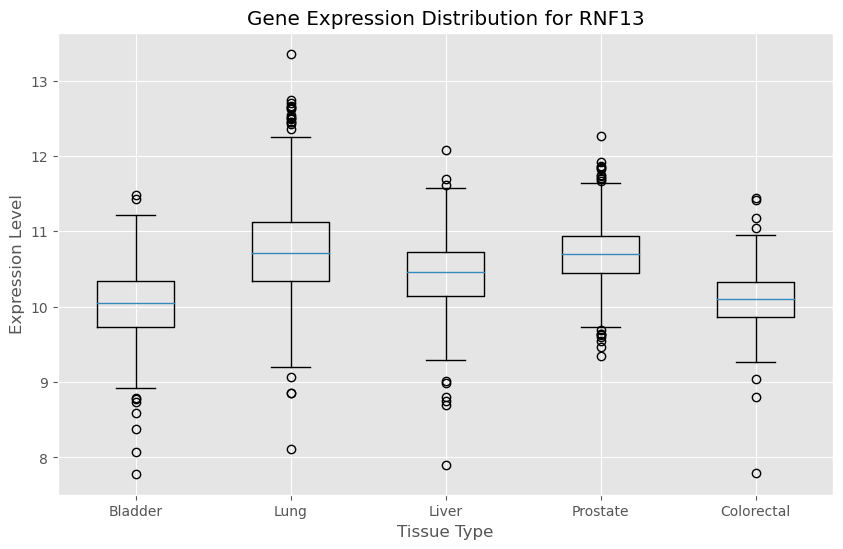

In [613]:
gene_name = 'RNF13'

RNF13_bladder = df_bladder[gene_name]
RNF13_lung = df_lung[gene_name]
RNF13_liver = df_liver[gene_name]
RNF13_prostate = df_prostate[gene_name]
RNF13_colorectal = df_colorectal[gene_name]

RNF13_gene_expressions = [RNF13_bladder, RNF13_lung, RNF13_liver, RNF13_prostate, RNF13_colorectal]

plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
plt.boxplot(RNF13_gene_expressions, labels=labels)
plt.title('Gene Expression Distribution for RNF13')
plt.ylabel('Expression Level')
plt.xlabel('Tissue Type')
plt.grid(True)

#plt.savefig('rnf13.png')
plt.show()